# Submission by: Kaushik Chakraborty

# Question 4

In [1]:
###importing necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
### Reading the fitco dataset into a pandas dataframe
fitco = pd.read_csv('fitco.csv')
fitco.head()

,Sales,SellingPrice,Returned
0,6186.0,88.5,0
1,5392.0,134.0,0
2,5064.0,144.5,0
3,10081.0,132.0,0
4,10053.5,135.5,1


In [4]:
fitco.shape

(1000, 3)

In [ ]:
##General info on the dataset
fitco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales         1000 non-null   float64
 1   SellingPrice  1000 non-null   float64
 2   Returned      1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [5]:
###General description of the numerical columns
fitco.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,1000.0,7876.2270,1975.587319,4511.5,6017.125,7642.0,9926.75,10536.0
SellingPrice,1000.0,110.5655,25.600749,50.5,96.000,114.0,132.00,150.0
Returned,1000.0,0.1130,0.316751,0.0,0.000,0.0,0.00,1.0


In [ ]:
###There appears to be no missing values in the dataset
##checking for confirming this observation
fitco.isnull().sum()

Sales           0
SellingPrice    0
Returned        0
dtype: int64

In [6]:
##Given information: The company wants to sell to tier 1 city customers

In [11]:
###Creating a new column in the dataset which captures the number of sales for a product
fitco['num_sales'] = np.ceil(fitco['Sales']/ fitco['SellingPrice']).astype(int)

fitco.head()

,Sales,SellingPrice,Returned,num_sales
0,6186.0,88.5,0,70
1,5392.0,134.0,0,41
2,5064.0,144.5,0,36
3,10081.0,132.0,0,77
4,10053.5,135.5,1,75


### In the next steps, let's just find what all insights can be drawn based on the data. We will start by looking at the pairwise plots.

<Figure size 1000x800 with 0 Axes>

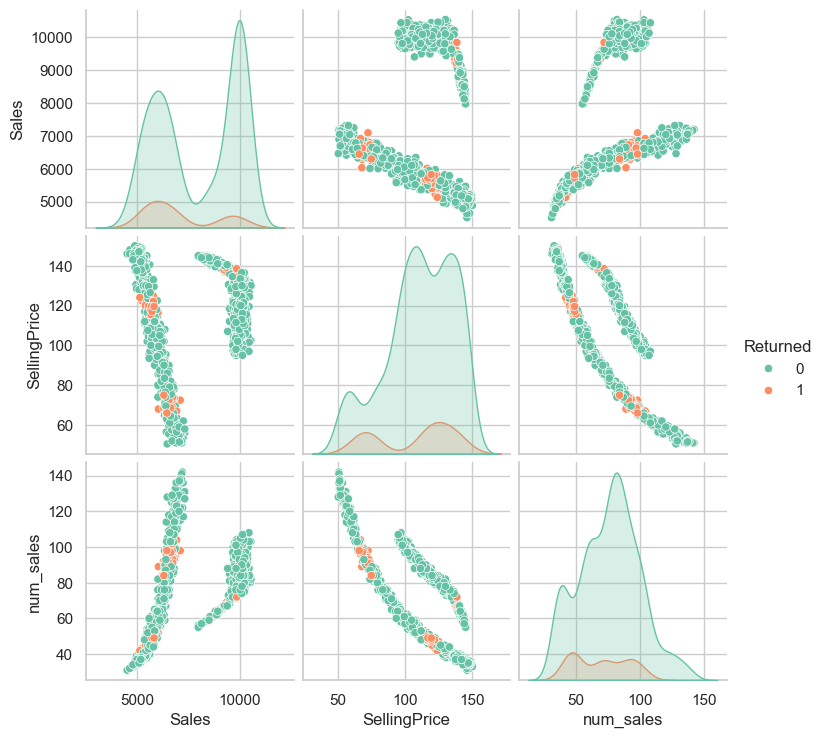

In [17]:
## sns pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(data = fitco, hue='Returned', diag_kind='kde', palette='Set2')
plt.show()

### From the paiplot, we see that clusters or segments of customers can be formed based on the data we have till now. 
### Let's also look at the heatmap of correlation matrix

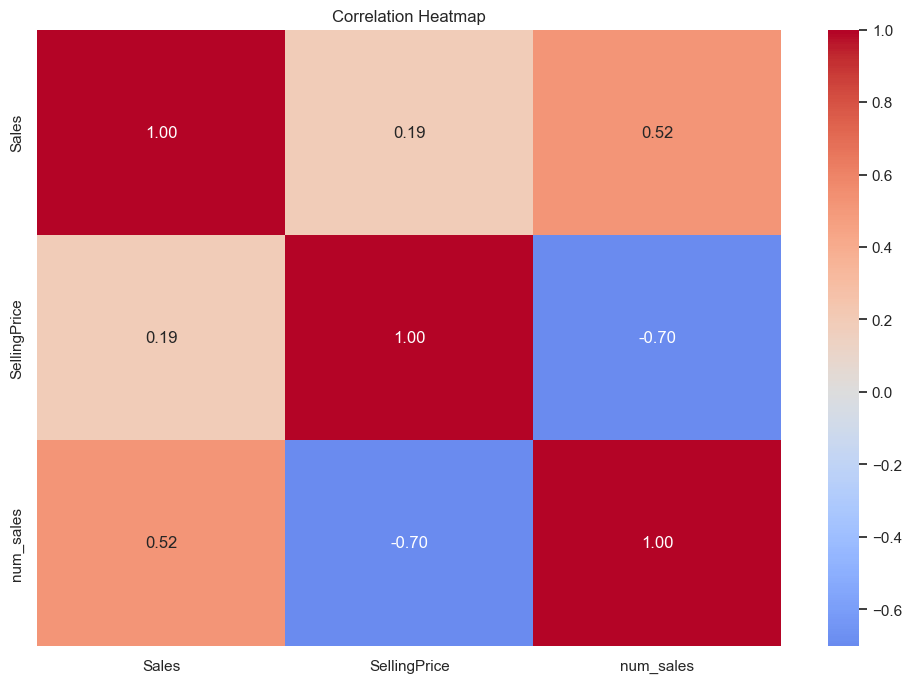

In [18]:
##Heatmap of the correlation matrix
fitco_subset = fitco[['Sales','SellingPrice', 'num_sales']]
plt.figure(figsize=(12, 8))
sns.heatmap(fitco_subset.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### From the correlation heatmap, we see that there is some significant 'negative' correlation between the number of sales made and the selling price of each item.
### We need to observe these features closely in the next steps.

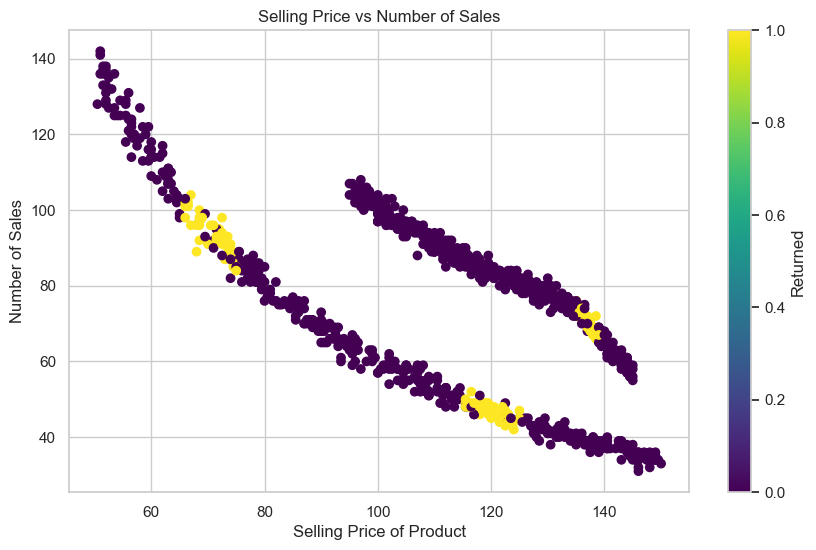

In [19]:
###Visualizing the variation of the number of sales with respect to the selling price
plt.figure(figsize=(10, 6))
plt.scatter(fitco['SellingPrice'], fitco['num_sales'], c=fitco['Returned'], cmap='viridis')
plt.title('Selling Price vs Number of Sales')
plt.xlabel('Selling Price of Product')
plt.ylabel('Number of Sales')
plt.colorbar(label='Returned')
plt.show()

### From the above graph, we can observe that there are few specific 'regions' where 'Returned' is true, which does not always overlap well with the cases where return is false.
### We need to dive deep into it by observing regions based on Returned flag.

### Note: Number of instances of not returned is higher than that for returned.(Ideally expected)

/var/folders/bp/_p8p3d4j4qq20ccmqb6cjs2w0000gn/T/ipykernel_86680/1991035496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Returned', data=fitco, palette='Set2')


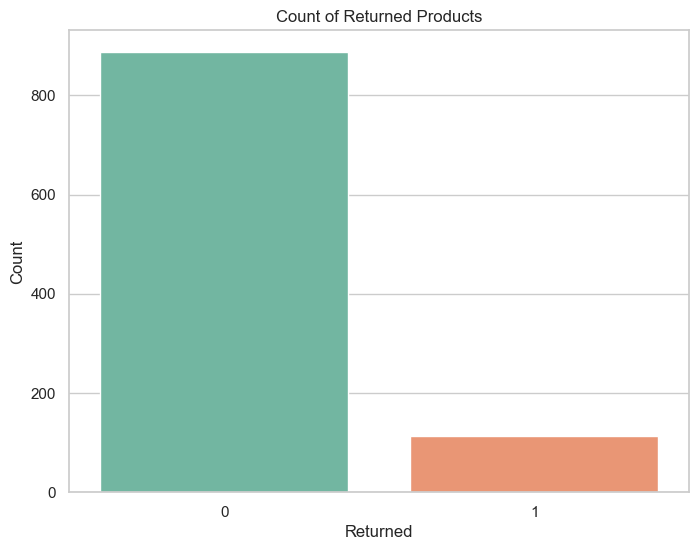

In [51]:
##Class imbalance with respect to the returned column
fitco['Returned'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
sns.countplot(x='Returned', data=fitco, palette='Set2')
plt.title('Count of Returned Products')
plt.xlabel('Returned')
plt.ylabel('Count')
plt.show()

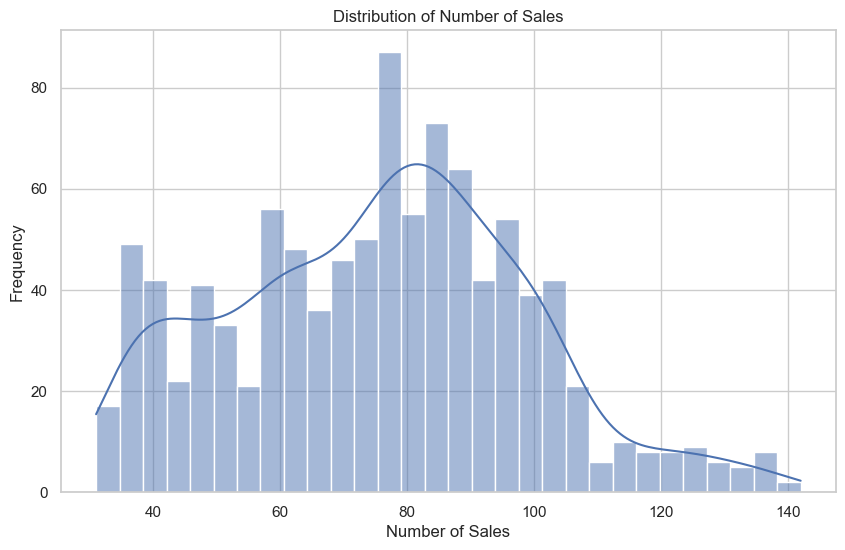

In [50]:
### Looking at the distribution of the number of sales
plt.figure(figsize=(10, 6))
sns.histplot(fitco['num_sales'], bins=30, kde=True)
plt.title('Distribution of Number of Sales')
plt.xlabel('Number of Sales')
plt.ylabel('Frequency')
plt.show()

### Maximum number of sales broadly falls in the frequency of 60-100. The data is slightly right skewed (expected in general). Our first aim should be to make the distribution more towards a gaussian distribution.

In [21]:
### segregating data based on the Returned flag

fitco_returned = fitco[fitco['Returned'] == 1]
fitco_not_returned = fitco[fitco['Returned'] == 0]


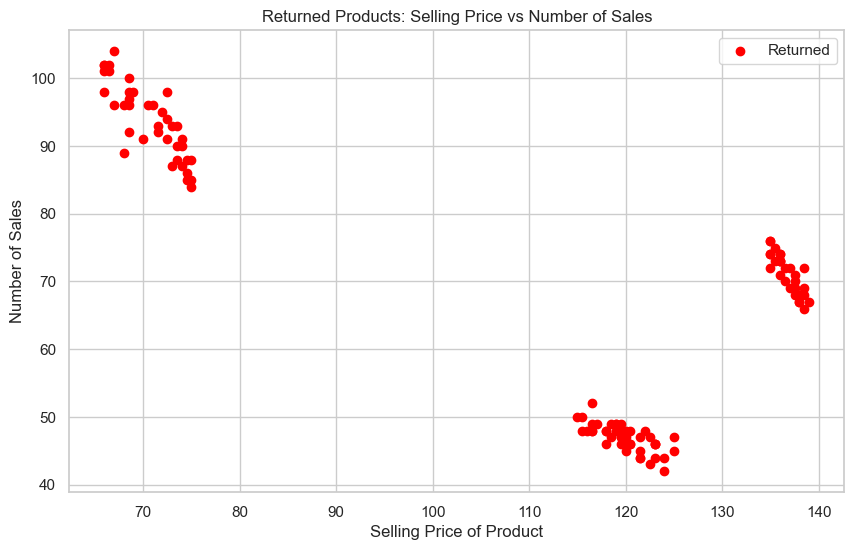

In [25]:
###Now, again looking at the plot of Selling Price vs Number of Sales for both the returned and not returned data sets

##Plotting for returned products
plt.figure(figsize=(10, 6))
plt.scatter(fitco_returned['SellingPrice'], fitco_returned['num_sales'], color='red', label='Returned')
plt.xlabel('Selling Price of Product')
plt.ylabel('Number of Sales')
plt.title('Returned Products: Selling Price vs Number of Sales')
plt.legend()
plt.show()


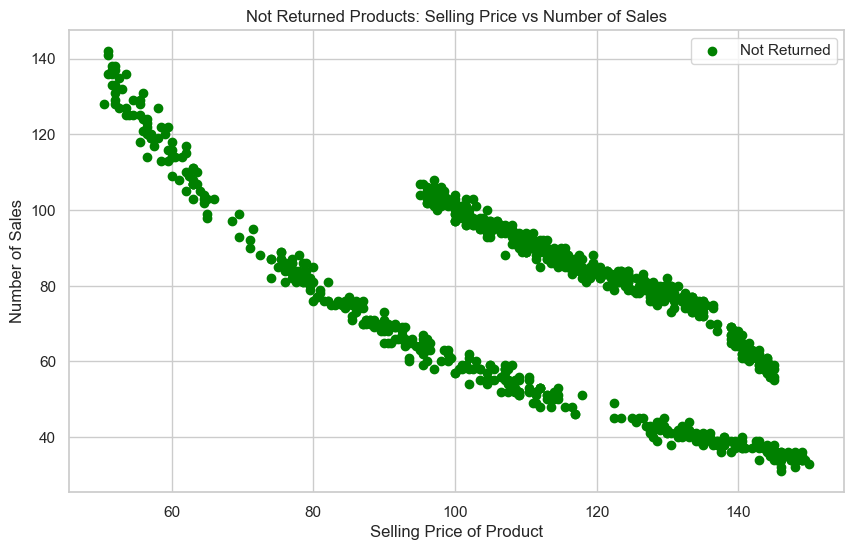

In [26]:
###Plotting for not returned products
plt.figure(figsize=(10, 6))
plt.scatter(fitco_not_returned['SellingPrice'], fitco_not_returned['num_sales'], color='green', label='Not Returned')
plt.xlabel('Selling Price of Product')
plt.ylabel('Number of Sales')
plt.title('Not Returned Products: Selling Price vs Number of Sales')
plt.legend()
plt.show()


### From the above plots itself, we can observe few things about the data. 

### In the plot for data with returned products, we can observe three clusters as following:
### -  When selling price is very low, and number of sales are very high, there are instances of product being returned. This is expected, given that the number of sales is also very high. Also, low selling price might be those products which are non-premium in terms of quality and use. High number of returns in this region seems logical.

### - When selling price is high, but number of sales are low. Here, the number of sales being low might be indicative of less used product. But high number of returns on such lower sales also points to some potential issue with the quality of product/services with respect to those products.

### - When selling price is very high, and number of sales is also moderate. This is the region, where Fitco needs to improve upon, because converting these to non-returns would directly impact positively in revenue!

### Similarly, in the plot for data with not returned products, we can atleast 4 visible clusters being formed. Also, the general trend being observed is that, there is a decrease in sales when the selling price of a unit is high.



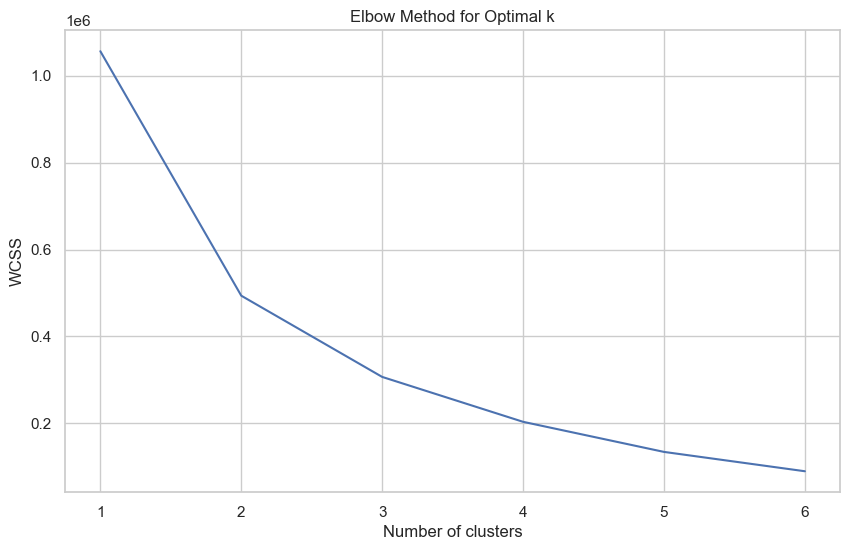

In [ ]:
## Using a k-means clustering algorithm to identify the clusters in the dataset where product was not returned.

from sklearn.cluster import KMeans

###First determining number of clusters using the elbow method
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(fitco_not_returned[['SellingPrice', 'num_sales']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), wcss)
plt.xticks(range(1, 7))
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




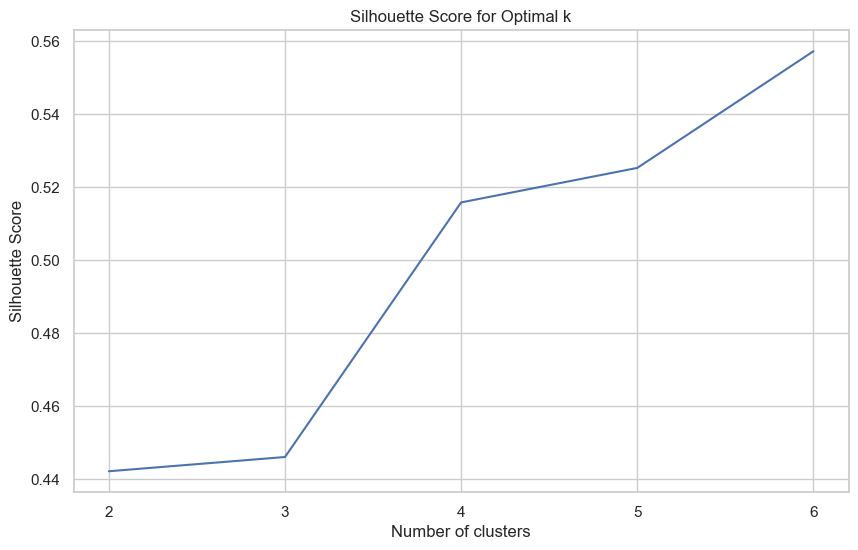

In [37]:
### Applying silhouette score to determine the optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(fitco_not_returned[['SellingPrice', 'num_sales']])
    silhouette_scores.append(silhouette_score(fitco_not_returned[['SellingPrice', 'num_sales']], kmeans.labels_))
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), silhouette_scores)
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters')
plt.xticks(range(2, 7))
plt.ylabel('Silhouette Score')
plt.show()

### From the above diagrams, it is safe to assume that the number of big clusters which can be formed is 4.

/var/folders/bp/_p8p3d4j4qq20ccmqb6cjs2w0000gn/T/ipykernel_86680/682698422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitco_not_returned['Cluster'] = kmeans.fit_predict(fitco_not_returned[['SellingPrice', 'num_sales']])


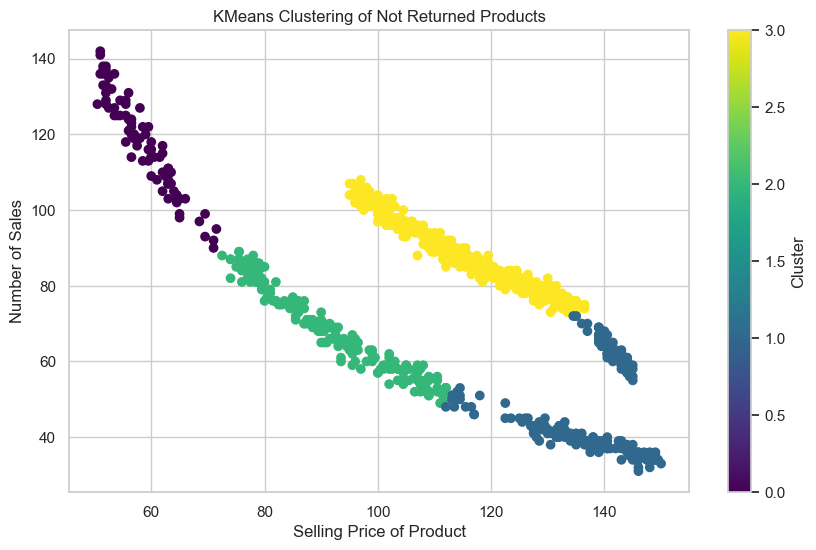

In [45]:
## Applying KMeans clustering with k=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, random_state=0)
fitco_not_returned['Cluster'] = kmeans.fit_predict(fitco_not_returned[['SellingPrice', 'num_sales']])
plt.figure(figsize=(10, 6))
plt.scatter(fitco_not_returned['SellingPrice'], fitco_not_returned['num_sales'], c=fitco_not_returned['Cluster'], cmap='viridis')
plt.title('KMeans Clustering of Not Returned Products')
plt.xlabel('Selling Price of Product')
plt.ylabel('Number of Sales')
plt.colorbar(label='Cluster')
plt.show()

### These are the final recommendations to the executive of Fitco:

### - To begin with, these observations are very much interpretable as they have been derived from actual data and not transformed data (like principle components). 
### - First recommendation: To sell in the class-A cities, we need to increase our marketing of products belonging to "cluster 3" (marked in yellow). These products have high selling price (which likely customers from class A cities would be able to spend upon), along with high potential for increased number of sales.

### - Second recommendation: Sales of products belonging to cluster '2' (marked in green) needs to be improved for selling to the common people (outside of Class A cities) atleast to the number of sales of cluster 3 (yellow). These products have slighly lower selling price while have potential to reach higher sales numbers.

### - Third recommendation: Need to take customer's feedback on products belonging to class 1 (marked in blue). These products have high selling price while lower number of sales, while also having high instances of returns. Either improving of product/services related to these products needs to be relooked at.